## Predicting College Admission Using Logistic Regression

#### Overview

A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school. The response variable, admit/don’t admit, is a binary variable. Logistic Regression is a statistical technique capable of predicting a binary outcome. Using admission data from UCLA, we will try to identify which factors influence admission into graduate school.

#### Data

    - GPA
    - GRE Score
    - Rank (Undegraduate Prestige)

This dataset has a binary response (outcome, dependent) variable called admit. There are three predictor variables: gre, gpa and rank. We will treat the variables gre and gpa as continuous. The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

#### Goal: Identify various factors that may influence admission into graduate school.

---

### Step 1: Import Packages

In [1]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/Users/alexcheng/miniconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Step 2: Import Data

In [2]:
df = pd.read_csv('data/binary.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Step 3: Data Cleaning

In [3]:
# Rename 'rank' to 'prestige'
df.columns = ['admit', 'gre', 'gpa', 'prestige']
print(df.columns)

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')


In [4]:
# Summarize the data
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
# Check out standard deviations
print(df.std())

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64


In [6]:
# Check out admittance to graduate school by prestige of undergraduate
print(pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


#### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ea5b278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111ef5208>]], dtype=object)

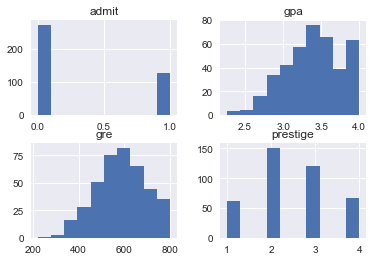

In [7]:
df.hist()

#### Get Dummy Variables

In [8]:
# get_dummies for 'prestige'
dummy_prestige = pd.get_dummies(df['prestige'], prefix='prestige')
print(dummy_prestige.head())

   prestige_1  prestige_2  prestige_3  prestige_4
0           0           0           1           0
1           0           0           1           0
2           1           0           0           0
3           0           0           0           1
4           0           0           0           1


In [9]:
# create a clean dataframe for regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_prestige.ix[:, 'prestige_2':])
print(data.head())

   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           1           0
1      1  660  3.67           0           1           0
2      1  800  4.00           0           0           0
3      1  640  3.19           0           0           1
4      0  520  2.93           0           0           1


#### Add Intercept

In [10]:
data['intercept'] = 1.0

### Step 4: Logistic Regression

In [11]:
# Data preprocessing
cols_to_keep = data.columns[1:]

X = data[cols_to_keep]
y = data['admit']

In [12]:
# Perform the logistic regression
logit = sm.Logit(y, X)

# Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


#### Results

In [13]:
# See the results
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.08292
Time:                        13:51:33   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In [14]:
# Check out the confidence intervals
print(result.conf_int())

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


#### Odds Ratio

Take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of being admitted. For example, we can expect the odds of being admitted to decrease by about 50% if the prestige of a school is 2. 

In [15]:
print(np.exp(result.params))

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64


In [16]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                2.5%     97.5%        OR
gre         1.000120  1.004418  1.002267
gpa         1.166122  4.281877  2.234545
prestige_2  0.273692  0.946358  0.508931
prestige_3  0.133055  0.515089  0.261792
prestige_4  0.093443  0.480692  0.211938
intercept   0.001981  0.172783  0.018500


### Step 5: Conclusion

We are confident that there is an inverse relationship between the probability of being admitted and the prestige of  a candidate's undergraduate school. The probability of being accepted into a graduate program is higher for students who attended a top ranked undergraduate college (`prestige_1==True`) as opposed to a lower ranked school with, say, `prestige_4==True`.